# Leti jadralnih letal

Za projekt pri predmetu Programiranje 1 bom analizirala lete jadralnih letal. Podatke sem dobila na strani [Online Contest](https://www.onlinecontest.org/olc-2.0/gliding/airfieldRanking.html?st=olc-league&rt=olc&c=SI&sc=&sp=2017), kjer sem zajela vse lete, ki so se začeli na slovenskih letališčih v sezoni 2017.

## Zajeti podatki

- datum
- točke
- ime pilota
- država pilota
- dolžina leta
- hitrost
- klub
- letalo
- vzlet
- pristanek
- letališče

## Analiza

In [106]:
import pandas as pd
import numpy as  np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 20

leti = pd.read_csv('leti.csv')
leti['Datum'] = pd.to_datetime(leti['Datum'], dayfirst=True)

# leti.set_index(leti.Datum, inplace=True)

Najprej si oglejmo podatke.

In [107]:
leti

,Datum,Točke,Ime,Država,Dolžina [km],Hitrost [km/h],Klub,Letalo,Vzlet,Pristanek,Letališče
0,2017-08-31,115.55,Jure Sirok,SI,81.30,51.24,AK Edvard Rusjan,L 13 Blanik,11:55,13:41,Ajdovščina
1,2017-08-15,175.14,Sandi Stanic,SI,163.82,62.43,AK Edvard Rusjan,SZD 55,13:05,15:51,Ajdovščina
2,2017-08-15,150.70,Aljaž Ogrin,SI,102.85,43.90,AK Josip Krizaj Ajdovscina,L 23 Super Blanik,11:54,14:39,Ajdovščina
3,2017-08-15,147.97,Darjo Gregoric,SI,116.64,55.02,AK Edvard Rusjan,Twin Astir RG,12:33,15:14,Ajdovščina
4,2017-08-01,152.25,Aljaž Ogrin,SI,104.78,48.42,AK Josip Krizaj Ajdovscina,L 13 Blanik,11:51,14:34,Ajdovščina
5,2017-07-28,0.00,Aljaž Ogrin,SI,218.66,48.81,AK Josip Krizaj Ajdovscina,DG 100,10:57,15:38,Ajdovščina
6,2017-07-19,0.00,Aljaž Ogrin,SI,171.02,52.66,AK Josip Krizaj Ajdovscina,DG 100,10:59,14:53,Ajdovščina
7,2017-07-08,0.00,Aljaž Ogrin,SI,69.19,39.54,AK Josip Krizaj Ajdovscina,DG 100,13:15,15:33,Ajdovščina
8,2017-07-05,0.00,Jure Sirok,SI,71.41,28.29,AK Edvard Rusjan,L 13 Blanik,11:14,14:13,Ajdovščina
9,2017-07-05,0.00,Črtomir Pavlin,SI,118.22,38.79,AK Edvard Rusjan,Twin Astir RG,11:29,14:52,Ajdovščina


### Najboljše razmere

Najprej si oglejmo datume, ki so bili primerni za letenje.

In [122]:
leti.groupby('Datum').size().sort_values(ascending=False)

Datum
2017-04-09    44
2017-04-30    42
2017-04-10    41
2017-06-11    24
2017-05-06    23
2017-04-14    22
2017-04-02    20
2017-04-01    19
2017-04-08    19
2017-05-27    19
              ..
2017-03-30     1
2017-07-30     1
2017-07-27     1
2017-07-02     1
2017-06-22     1
2017-06-01     1
2017-05-31     1
2017-04-16     1
2017-05-29     1
2017-03-23     1
Length: 129, dtype: int64

Vidimo, da je bilo v sezoni 2017 129 dni primernih za letenje, saj je bil tiste dni opravljen vsaj en let.

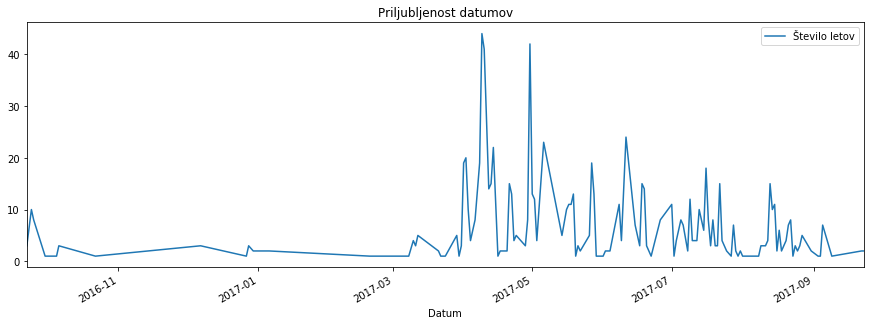

In [229]:
leti.groupby('Datum').size().to_frame('Število letov').plot(figsize=(15,5), title='Priljubljenost datumov')

Vidimo, da je bilo v sezoni 2017 129 dni primernih za letenje, saj je bil tiste dni opravljen vsaj en let. Od teh so bili najbolj popularni tisti med aprilom in septembrom.

In [172]:
# Dodan mesec v razpredelnico.
leti['Mesec'] = leti['Datum'].dt.month

In [228]:
leti[['Mesec', 'Datum']].groupby('Mesec').size().sort_values(ascending=False)

Mesec
4     311
7     152
5     147
8      95
6      95
9      36
3      27
12      9
10      5
1       2
2       1
dtype: int64

Najbolj popularni meseci so od aprila do avgusta.

Ker si piloti želijo opraviti čim daljše lete, se bomo zdaj pri analiziranju najboljših razmer osredotočili na letališča in dolžine letov. Poskušali bomo ugotoviti, kje in kdaj nastajajo najdaljši leti.

In [189]:
leti[['Dolžina [km]', 'Letališče']].sort_values('Dolžina [km]', ascending=False)[:20]

,Dolžina [km],Letališče
815,999.45,Ptuj Moškanjci
259,989.71,Lesce Bled
455,975.72,Lesce Bled
451,921.17,Lesce Bled
459,920.86,Lesce Bled
224,898.99,Lesce Bled
470,875.17,Lesce Bled
254,866.40,Lesce Bled
265,852.73,Lesce Bled
264,851.50,Lesce Bled


Najdaljši leti v sezoni 2017 so nastajali večinoma na letališču Lesce Bled. Zanima me, ali je to le dosti izjem, ali so tudi v povprečju tam nastajali najdaljši leti.

In [184]:
leti[['Letališče', 'Dolžina [km]']].groupby('Letališče').mean().sort_values('Dolžina [km]', ascending=False)

,Dolžina [km]
Letališče,
Cerklje,343.080000
Lesce Bled,339.762233
Slovenj Gradec,331.673636
Velenje Lajše,311.819091
Celje,266.250000
Murska Sobota,230.047391
Maribor,218.490893
Ptuj Moškanjci,214.175047
Novo mesto,206.752955


Poglejmo še bolj natančno kombinacijo letov po mesecih in lokacijo.

In [234]:
leti[['Letališče', 'Dolžina [km]', 'Mesec']].groupby(['Mesec', 'Letališče'], as_index=False)['Dolžina [km]'].mean().sort_values('Dolžina [km]', ascending=False)[:10]

,Mesec,Letališče,Dolžina [km]
4,3,Lesce Bled,536.974286
9,3,Ptuj Moškanjci,509.980000
51,7,Velenje Lajše,467.560000
0,1,Maribor,437.910000
14,4,Lesce Bled,364.999879
34,6,Celje,355.626429
25,5,Lesce Bled,346.753571
3,3,Cerklje,343.080000
20,4,Slovenj Gradec,339.140000
45,7,Lesce Bled,338.979302


Tu je zbranih 10 najboljših kombinacij za lokacijo in mesec, ko so v povprečju nastajali najdaljši leti. V dosti primerih so meseci izven najbolj popularnih. Skoraj brez dvoma lahko za najboljšo lokacijo izberemo Lesce Bled.

### O pilotih

In [99]:
leti.groupby('Država').size().sort_values(ascending=False)

Država
SI    627
DE    224
IT     17
PL      8
AT      4
dtype: int64

Opazimo, da pri nas leti presenetljivo veliko Nemcev, medtem ko pilotov iz sosednjih držav skoraj ni.

In [211]:
def graf(tabela, stolpec, naslov, imena):
    leti = pd.concat([tabela[tabela.Država == 'SI'][stolpec].value_counts(), 
                    tabela[tabela.Država == 'DE'][stolpec].value_counts(), 
                    tabela[tabela.Država == 'IT'][stolpec].value_counts(), 
                    tabela[tabela.Država == 'PL'][stolpec].value_counts(), 
                    tabela[tabela.Država == 'AT'][stolpec].value_counts()], 
                   axis=1)
    leti.columns = imena
    return leti.plot(kind='bar', fontsize='12',title=naslov, figsize=(15,5))

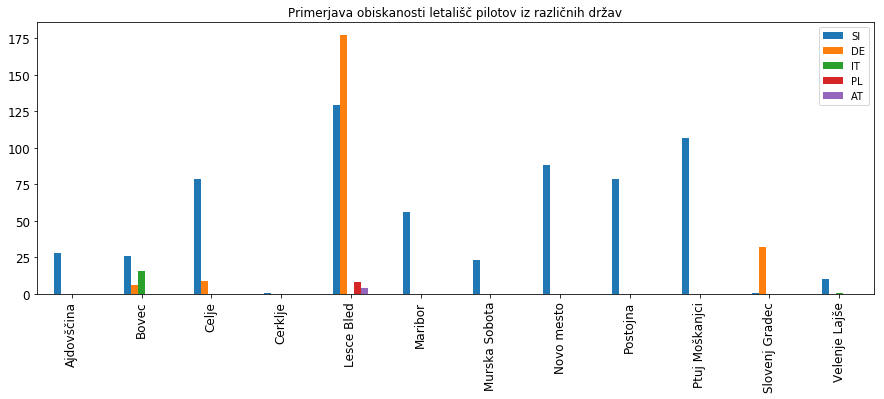

In [212]:
graf(leti, 'Letališče', 'Primerjava obiskanosti letališč pilotov iz različnih držav', 
    ['SI', 'DE', 'IT', 'PL', 'AT'])

V Lescah in Slovenj Gradcu leti celo več Nemcev kot Slovencev. V Lesce gredo najraje tudi Poljaki in Avstrijci, Italijani pa raje letijo v Bovcu.

In [181]:
leti_tujih_pilotov = leti[leti.Država != 'SI']

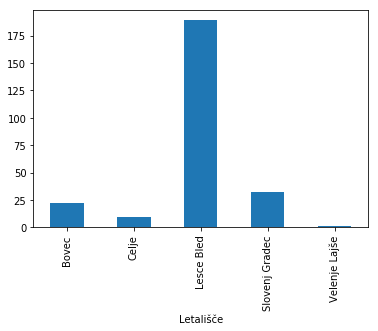

In [116]:
leti_tujih_pilotov.groupby('Letališče').size().plot(kind='bar')

V prejšnjem razdelku smo ugotovili, da Lesce Bled ponuja najboljše razmere. Verjetno je tudi zato bolj popularen za tuje pilote.

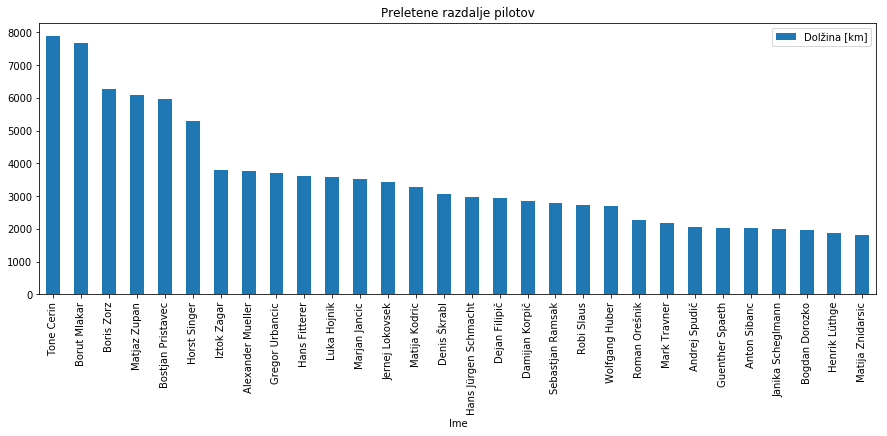

In [232]:
leti[['Ime', 'Dolžina [km]']].groupby('Ime').sum().sort_values('Dolžina [km]', ascending=False)[:30].plot(kind='bar', figsize=(15, 5), title='Preletene razdalje pilotov')

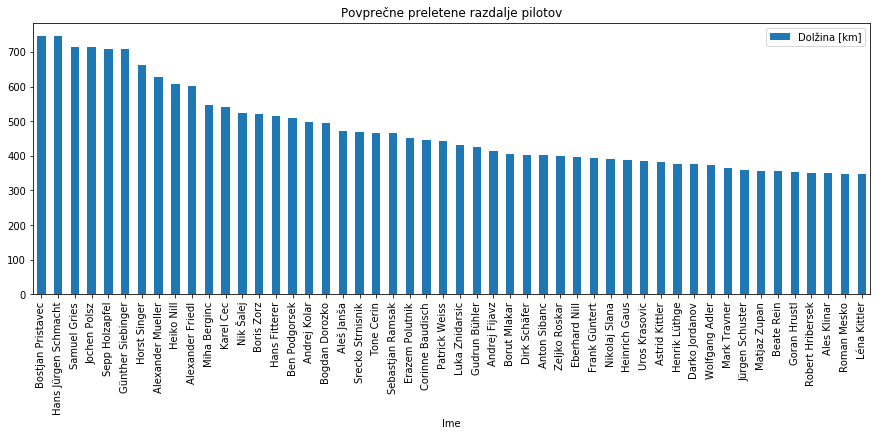

In [239]:
leti[['Ime', 'Dolžina [km]']].groupby('Ime').mean().sort_values('Dolžina [km]', ascending=False)[:50].plot(title='Povprečne preletene razdalje pilotov', kind='bar', figsize=(15, 5))

### Najboljši slovenski klubi

In [242]:
leti_slovenskih_pilotov = leti[leti.Država == 'SI']

In [244]:
leti_slovenskih_pilotov.groupby('Klub').size().sort_values(ascending=False)

Klub
AK Ptuj                       116
ALC Lesce/Bled                102
AK Novo mesto                  90
AK Celje                       69
LC Maribor                     62
AK Edvard Rusjan               57
AK Postojna                    55
AK Murska Sobota               24
AK Ljubljana                   19
 No Club                       12
KAS                             5
DLC                             5
AK Josip Krizaj Ajdovscina      5
celje                           3
AK-Gorenje                      3
dtype: int64

In [248]:
preletena_dolzina = leti_slovenskih_pilotov[['Dolžina [km]', 'Klub']].groupby('Klub').sum().sort_values('Dolžina [km]', ascending=False)

In [250]:
preletena_dolzina

,Dolžina [km]
Klub,
ALC Lesce/Bled,41282.53
AK Ptuj,23640.54
AK Celje,21008.37
AK Novo mesto,18622.96
LC Maribor,13344.87
AK Postojna,11102.91
AK Edvard Rusjan,9106.77
AK Murska Sobota,5528.70
AK Ljubljana,4809.39


In [251]:
povprecna_dolzina = leti_slovenskih_pilotov[['Dolžina [km]', 'Klub']].groupby('Klub').mean().sort_values('Dolžina [km]', ascending=False)

In [252]:
povprecna_dolzina

,Dolžina [km]
Klub,
ALC Lesce/Bled,404.730686
AK-Gorenje,353.680000
AK Celje,304.469130
KAS,258.252000
AK Ljubljana,253.125789
AK Murska Sobota,230.362500
LC Maribor,215.239839
AK Novo mesto,206.921778
AK Ptuj,203.797759


In [253]:
povprecna_hitrost = leti_slovenskih_pilotov[['Hitrost [km/h]', 'Klub']].groupby('Klub').mean().sort_values('Hitrost [km/h]', ascending=False)

In [254]:
povprecna_hitrost

,Hitrost [km/h]
Klub,
ALC Lesce/Bled,74.856961
AK Celje,65.597101
AK-Gorenje,63.246667
AK Murska Sobota,61.659583
AK Ljubljana,60.730000
AK Edvard Rusjan,59.475263
AK Postojna,55.598000
AK Novo mesto,55.387889
LC Maribor,51.033387


Piloti iz ALC Lesce Bled so v sezoni 2017 delali najhitrejše in najdaljše lete.

### Splošno

Zanima me še, če obstaja kakšna povezava med hitrostjo in dolžino leta.

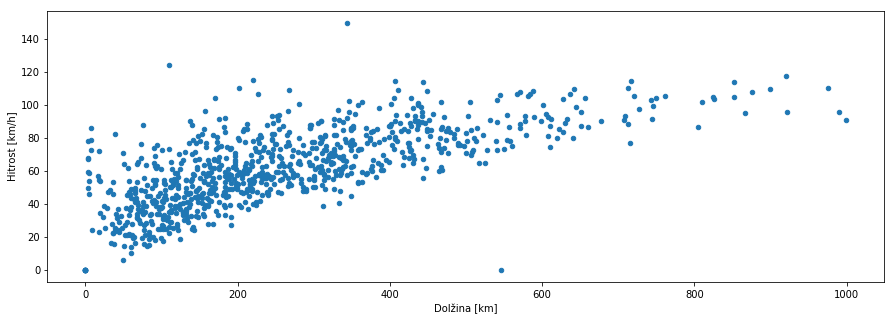

In [268]:
leti.sort_values('Dolžina [km]', ascending=True).plot(figsize=(15,5), x='Dolžina [km]', y='Hitrost [km/h]', kind='scatter')

Iz grafa lahko razberemo, da so bili daljši leti tudi hitrejši. Vidimo pa tudi, da se je podobne hitrosti dalo pridobiti tudi na krajših letih.

## Zaključek

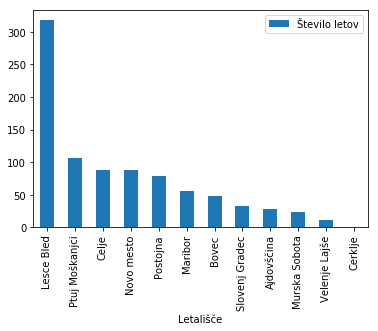

In [270]:
leti.groupby('Letališče').size().to_frame('Število letov').sort_values('Število letov', ascending=False).plot(kind='bar')

In [271]:
leti.groupby('Datum')['Dolžina [km]'].mean().sort_values(ascending=False)[:5]

Datum
2017-04-20    711.640000
2017-04-06    587.958750
2017-07-06    578.022857
2017-05-26    485.500000
2017-04-03    480.322000
Name: Dolžina [km], dtype: float64